### Exploring the files with Pandas
Many statistical Python packages can deal with numpy Arrays.

Numpy Arrays however are not always easy to use. 

Pandas is a package that provides a dataframe interface, similar to what R uses as the main data structure.
Since Pandas has become so popular, many packages accept both pd.DataFrames and numpy Arrays.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

### First some environment variables
We now use the files that are stored in the RAW directory.

If we decide to change the data format by changing names, adding features, created summary data frames etc., we will save those files in the INTERIM directory.

In [2]:
PROJECT_DIR = os.path.dirname(dotenv_path)
RAW_DATA_DIR = PROJECT_DIR + os.environ.get("RAW_DATA_DIR")
INTERIM_DATA_DIR = PROJECT_DIR + os.environ.get("INTERIM_DATA_DIR")
files=os.environ.get("FILES").split()

print("Project directory is  : {0}".format(PROJECT_DIR))
print("Raw data directory is : {0}".format(RAW_DATA_DIR))
print("Interim directory is  : {0}".format(INTERIM_DATA_DIR))

Project directory is  : /home/gsentveld/lunch_and_learn
Raw data directory is : /home/gsentveld/lunch_and_learn/data/raw
Interim directory is  : /home/gsentveld/lunch_and_learn/data/interim


### Importing pandas and matplotlib.pyplot

In [3]:
# The following jupyter notebook magic makes the plots appear in the notebook. 
# If you run in batch mode, you have to save your plots as images.
%matplotlib inline

# matplotlib.pyplot is traditionally imported as plt
import matplotlib.pyplot as plt

# Pandas is traditionaly imported as pd.
import pandas as pd
from pylab import rcParams

# some display options to size the figures. feel free to experiment
pd.set_option('display.max_columns', 25)
rcParams['figure.figsize'] = (17, 7)

### Reading a file in Pandas
Reading a CSV file is really easy in Pandas. There are several formats that Pandas can deal with.

|Format Type|Data Description|Reader|Writer|
|---|---|---|---|
|text|CSV|read_csv|to_csv|
|text|JSON|read_json|to_json|
|text|HTML|read_html|to_html|
|text|Local clipboard|read_clipboard|to_clipboard|
|binary|MS Excel|read_excel|to_excel|
|binary|HDF5 Format|read_hdf|to_hdf|
|binary|Feather Format|read_feather|to_feather|
|binary|Msgpack|read_msgpack|to_msgpack|
|binary|Stata|read_stata|to_stata|
|binary|SAS|read_sas ||
|binary|Python Pickle Format|read_pickle|to_pickle|
|SQL|SQL|read_sql|to_sql|
|SQL|Google Big Query|read_gbq|to_gbq|

We will use <code>pd.read_csv()</code>.

As you will see, the Jupyter notebook prints out a very nice rendition of the DataFrame object that is the result

In [4]:

family=pd.read_csv(RAW_DATA_DIR+'/familyxx.csv')
persons=pd.read_csv(RAW_DATA_DIR+'/personsx.csv')
samadult=pd.read_csv(RAW_DATA_DIR+'/samadult.csv')

In [5]:
househld=pd.read_csv(RAW_DATA_DIR+'/househld.csv')
househld

,INTV_QRT,INTV_MON,LIVQRT,ACPTCHLD,REJ_PER,REJ_FAM,ACPT_PER,ACPT_FAM,NON_INTV,RECTYPE,SRVY_YR,HHX,REGION,WTIA_HH,WTFA_HH,STRAT_P,PSU_P
0,1,3,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,1,2,3052.5,0,108,2
1,1,3,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,2,1,2497.5,0,47,2
2,1,3,1,NaN,NaN,NaN,NaN,NaN,2.0,10,2015,3,1,1086.7,0,19,2
3,1,1,1,0.0,0.0,0.0,1.0,1.0,NaN,10,2015,4,3,3330.0,3330,163,2
4,1,3,1,2.0,0.0,0.0,4.0,1.0,NaN,10,2015,5,4,138.7,185,289,2
5,1,2,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2015,6,1,668.8,0,45,1
6,1,1,1,NaN,NaN,NaN,NaN,NaN,5.0,10,2015,10,1,3330.0,0,31,2
7,1,2,1,0.0,0.0,0.0,1.0,1.0,NaN,10,2015,11,4,2200.0,4400,274,2
8,1,1,1,0.0,0.0,0.0,2.0,1.0,NaN,10,2015,13,3,3330.0,4171,199,2
9,1,2,1,NaN,NaN,NaN,NaN,NaN,2.0,10,2015,14,2,436.3,0,114,1


### A bit about Series and DataFrames

Pandas uses two main data structures:
    - Series
    - DataFrames
    
Series are lists of elements with an index. The index can be simple (0,1,2,3,...) or complex (01-Jan-17, 02-Jan-17, ...)

DataFrames can be seen as a dictionary of Series.

This means you can access a column by name.

In [6]:
persons_in_household=househld['ACPT_PER']

You can index the result like you would index a list

In [7]:
print(persons_in_household[:5])

0    NaN
1    NaN
2    NaN
3    1.0
4    4.0
Name: ACPT_PER, dtype: float64


But the type is a Series

In [8]:
print(type(persons_in_household))

<class 'pandas.core.series.Series'>


and that means it has additional attributes, like name, and summary stats

In [9]:
print(persons_in_household.name)

ACPT_PER


In [10]:
print(persons_in_household.describe())

count    41493.000000
mean         2.501362
std          1.484156
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: ACPT_PER, dtype: float64


### Selecting multiple columns
If you select multiple columns, the result again is a DataFrame

In [11]:
accepted=househld[['ACPT_PER','ACPTCHLD']]
print(type(accepted))

<class 'pandas.core.frame.DataFrame'>


In [12]:
print(accepted.head())

   ACPT_PER  ACPTCHLD
0       NaN       NaN
1       NaN       NaN
2       NaN       NaN
3       1.0       0.0
4       4.0       2.0


### Basic Stats and Plotting
Pandas has a lot of built-in statistical functionality and plotting features

In [13]:
accepted.describe()

,ACPT_PER,ACPTCHLD
count,41493.000000,41493.000000
mean,2.501362,0.618900
std,1.484156,1.067412
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,15.000000,10.000000


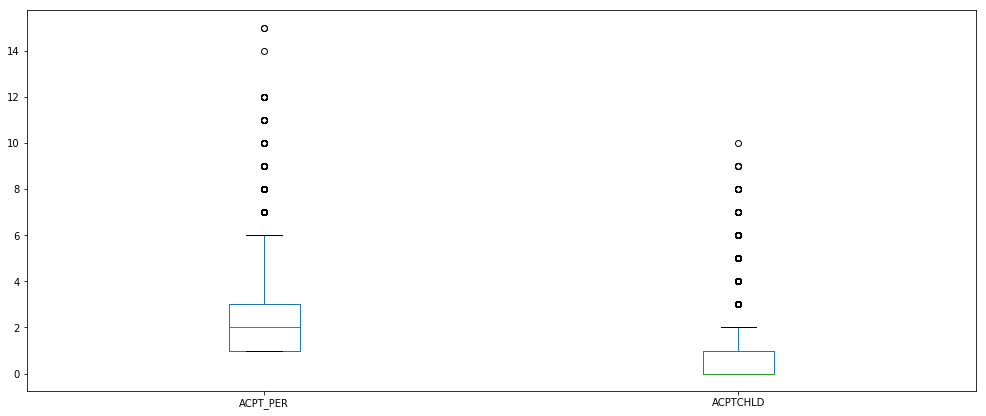

In [14]:
accepted.plot(kind='box')

### Looking at the data by Region
We can have a look at the data by region. This shows another very simple way of plotting data. 

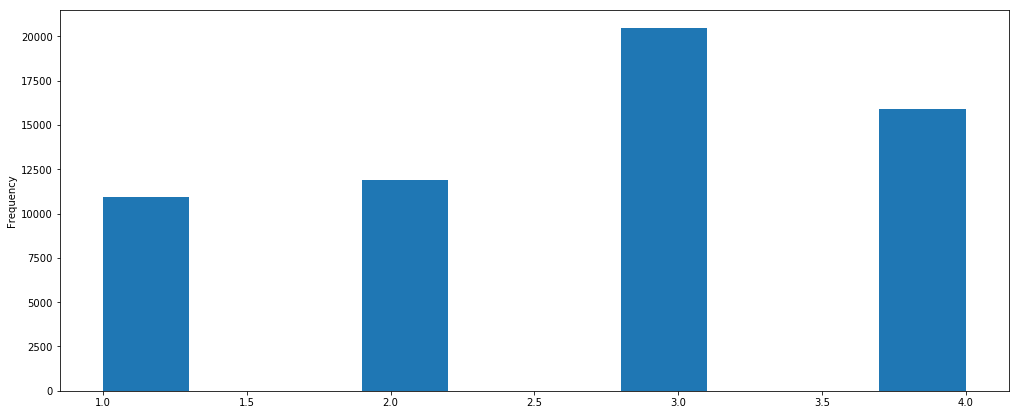

In [15]:
househld['REGION'].plot(kind='hist')

What we see is that the number of responses is not equally divided. But the data also has a weight for the household that allows us to extrapolate to the overal US population. 

We will use Group By to add up the weights. 



In [16]:
by_region=househld[['REGION','WTFA_HH']].groupby('REGION').sum()
by_region

,WTFA_HH
REGION,
1,17435297
2,22331153
3,36557976
4,22025663


Add a column

In [17]:
responses=househld[['REGION','WTFA_HH']].groupby('REGION').count()
responses.name = "Responses"

by_region['Responses']=responses
by_region

,WTFA_HH,Responses
REGION,,
1,17435297,10937
2,22331153,11913
3,36557976,20447
4,22025663,15873


And we will change the index to a more complex one, based on the [documentation of the household file](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2015/househld_layout.pdf).

In [18]:
by_region.index=['Northeast','Midwest','South','West']
by_region

,WTFA_HH,Responses
Northeast,17435297,10937
Midwest,22331153,11913
South,36557976,20447
West,22025663,15873


### Saving this result
We can use any of the to_xyz() functions to save this data to a file.

Here we don't supply a path to save the data, which in turn just returns the result in the requested format.

In [19]:
print(by_region.to_json())

{"WTFA_HH":{"Northeast":17435297,"Midwest":22331153,"South":36557976,"West":22025663},"Responses":{"Northeast":10937,"Midwest":11913,"South":20447,"West":15873}}


### Dealing with missing values
It appears that the household file also holds information about why people did not respond. This field is empty if people responded.

We are going to use that to filter the data, with a boolean index.

We will use the NON_INTV response code to create the boolean index

In [20]:
non_response_code=househld['NON_INTV']

In [21]:
import math

# If the value Is Not A Number math.isnan() will return True.

responded=[math.isnan(x) for x in non_response_code]
notresponded=[not math.isnan(x) for x in non_response_code]

resp=househld[responded]
nonresp=househld[notresponded]

print("Total size: {}".format(househld.shape))
print("Responses: {}".format(resp.shape))
print("Non responses: {}".format(nonresp.shape))

Total size: (59170, 17)
Responses: (41493, 17)
Non responses: (17677, 17)


Now we create a group by the reason code, why people did not respond

In [22]:
non_intv_group=nonresp.groupby('NON_INTV')

In [23]:
non_intv_group.size()

NON_INTV
1.0    12061
2.0     3309
3.0      323
4.0      142
5.0     1842
dtype: int64

### Filling missing data
If we just plot the data from the original DataFrame, we only get the data with a value.

We can use the fillna() function to solve that and see all data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff172c4bac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff171ae2198>]], dtype=object)

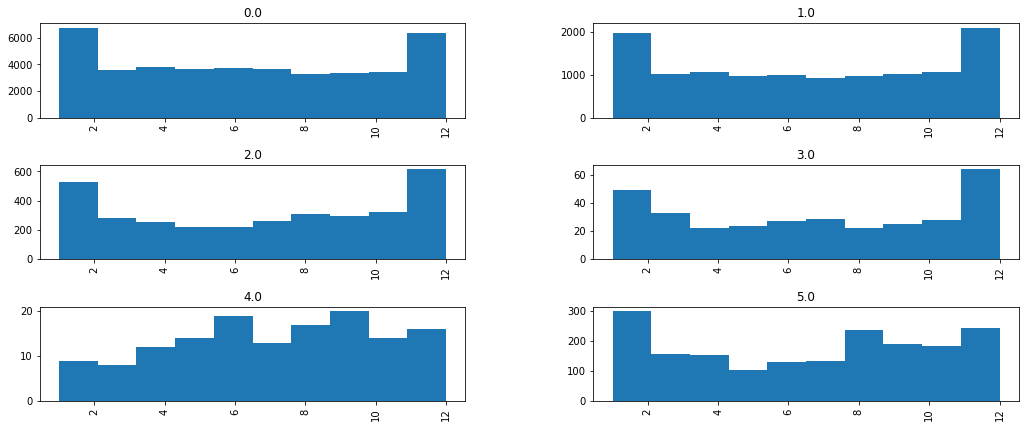

In [24]:
househld['INTV_MON'].hist(by=househld['NON_INTV'].fillna(0))

[Back to Agenda](http://localhost:8000/notebooks/Lunch_And_Learn_Session_2_Index.slides.html)